In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE=256
CHANNELS=3

train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator=train_datagen.flow_from_directory(
    'Output/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=3,
    class_mode='sparse',
    #save_to_dir='AugmentedImages'
)

Found 14815 images belonging to 16 classes.


In [3]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.5181191  0.53772694 0.61223674]
  [0.5218704  0.5414782  0.615988  ]
  [0.523322   0.5429298  0.6174396 ]
  ...
  [0.4928802  0.51248807 0.59091944]
  [0.51880985 0.5384177  0.61684906]
  [0.5547048  0.5743126  0.652744  ]]

 [[0.45503223 0.47464007 0.54914993]
  [0.45202005 0.4716279  0.5461377 ]
  [0.45637482 0.47598267 0.5504925 ]
  ...
  [0.4904609  0.5100687  0.58850014]
  [0.5212292  0.54083705 0.6192684 ]
  [0.55688214 0.57649    0.6549214 ]]

 [[0.5351345  0.55474234 0.62925214]
  [0.5358199  0.55542773 0.6299375 ]
  [0.53049743 0.5501053  0.6246151 ]
  ...
  [0.48804158 0.5076494  0.5860808 ]
  [0.5236485  0.54325634 0.62168777]
  [0.55905956 0.5786674  0.65709877]]

 ...

 [[0.36907762 0.3729992  0.44358745]
  [0.4040676  0.40798917 0.4785774 ]
  [0.4150421  0.41896367 0.48955193]
  ...
  [0.3676569  0.35589218 0.42255884]
  [0.3662053  0.3544406  0.42110726]
  [0.36475372 0.35298902 0.41965568]]

 [[0.3625455  0.36646706 0.43705532]
  [0.40697077 0.41089234 0.4814806 ]


In [4]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'Output/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2361 images belonging to 16 classes.


In [5]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'Output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 4248 images belonging to 16 classes.


In [6]:
class_names = list(train_generator.class_indices.keys())


In [7]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.47962674 0.46786204 0.49531302]
  [0.47900152 0.46723682 0.4946878 ]
  [0.4783763  0.4666116  0.49406257]
  ...
  [0.5796142  0.5678495  0.61098677]
  [0.5851541  0.5733894  0.61652666]
  [0.55728024 0.54551554 0.58865285]]

 [[0.49253687 0.48077217 0.5082231 ]
  [0.49128643 0.47952172 0.5069727 ]
  [0.49003598 0.47827128 0.5057223 ]
  ...
  [0.5811773  0.5694126  0.61254984]
  [0.5835911  0.5718264  0.61496365]
  [0.55384153 0.5420768  0.5852141 ]]

 [[0.5081732  0.49640852 0.5238595 ]
  [0.5069228  0.49515808 0.52260906]
  [0.50567234 0.49390763 0.5213586 ]
  ...
  [0.5827403  0.5709756  0.61411285]
  [0.58202803 0.5702633  0.6134006 ]
  [0.5504028  0.5386381  0.58177537]]

 ...

 [[0.3947729  0.3947729  0.40261602]
  [0.40129554 0.40129554 0.40913868]
  [0.40263852 0.40263852 0.41048166]
  ...
  [0.43026176 0.4263402  0.4498696 ]
  [0.42901132 0.42508975 0.44861916]
  [0.42776087 0.4238393  0.4473687 ]]

 [[0.3953981  0.3953981  0.40324125]
  [0.40160817 0.40160817 0.4094513 ]


In [8]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 16

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [11]:
14440/32

451.25

In [12]:
2058/32

64.3125

In [48]:
history = model.fit(
    train_generator,
    steps_per_epoch=200,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=64,
    verbose=1,
    epochs=500,
    
)

Epoch 1/500
200/200 [==============================] - ETA: 0s - loss: 0.9689 - accuracy: 0.6817

C:\Users\anoop\AppData\Roaming\Python\Python39\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


200/200 [==============================] - 92s 463ms/step - loss: 0.9689 - accuracy: 0.6817 - val_loss: 0.9241 - val_accuracy: 0.6885
Epoch 2/500
200/200 [==============================] - 91s 454ms/step - loss: 1.0275 - accuracy: 0.6417 - val_loss: 0.9249 - val_accuracy: 0.6851
Epoch 3/500
200/200 [==============================] - 88s 443ms/step - loss: 0.9872 - accuracy: 0.6867 - val_loss: 1.0655 - val_accuracy: 0.6431
Epoch 4/500
200/200 [==============================] - 90s 453ms/step - loss: 1.0321 - accuracy: 0.6633 - val_loss: 1.0463 - val_accuracy: 0.6479
Epoch 5/500
200/200 [==============================] - 105s 524ms/step - loss: 1.0146 - accuracy: 0.6650 - val_loss: 0.8657 - val_accuracy: 0.7026
Epoch 6/500
200/200 [==============================] - 97s 488ms/step - loss: 1.0138 - accuracy: 0.6600 - val_loss: 0.8756 - val_accuracy: 0.7065
Epoch 7/500
200/200 [==============================] - 108s 543ms/step - loss: 1.0072 - accuracy: 0.6367 - val_loss: 0.9208 - val_accur

In [49]:
scores = model.evaluate(test_generator)

133/133 [==============================] - 99s 747ms/step - loss: 0.4074 - accuracy: 0.8684


In [50]:
scores


[0.40736645460128784, 0.8684086799621582]

In [51]:
history


In [52]:
history.params


{'verbose': 1, 'epochs': 500, 'steps': 200}

In [53]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [54]:
type(history.history['loss'])

list

In [55]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.968897819519043,
 1.0274604558944702,
 0.987217903137207,
 1.0320854187011719,
 1.0146280527114868]

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [57]:
val_acc

[0.6884765625,
 0.68505859375,
 0.64306640625,
 0.64794921875,
 0.70263671875,
 0.70654296875,
 0.69189453125,
 0.71630859375,
 0.70263671875,
 0.66162109375,
 0.712890625,
 0.65771484375,
 0.67822265625,
 0.72412109375,
 0.68359375,
 0.7060546875,
 0.7158203125,
 0.73486328125,
 0.736328125,
 0.73388671875,
 0.74267578125,
 0.72607421875,
 0.74462890625,
 0.71826171875,
 0.70947265625,
 0.74169921875,
 0.71435546875,
 0.7392578125,
 0.74560546875,
 0.7294921875,
 0.77490234375,
 0.7001953125,
 0.77099609375,
 0.73974609375,
 0.765625,
 0.74169921875,
 0.75146484375,
 0.75830078125,
 0.759765625,
 0.77001953125,
 0.75048828125,
 0.7509765625,
 0.7861328125,
 0.775390625,
 0.74560546875,
 0.7763671875,
 0.7734375,
 0.7197265625,
 0.78125,
 0.7548828125,
 0.740234375,
 0.724609375,
 0.78564453125,
 0.76025390625,
 0.76123046875,
 0.7802734375,
 0.76611328125,
 0.75927734375,
 0.64404296875,
 0.7705078125,
 0.77587890625,
 0.744140625,
 0.7685546875,
 0.80419921875,
 0.7666015625,
 0.7919

In [58]:
acc

[0.6816666722297668,
 0.6416666507720947,
 0.6866666674613953,
 0.6633333563804626,
 0.6650000214576721,
 0.6600000262260437,
 0.6366666555404663,
 0.6816666722297668,
 0.653333306312561,
 0.6650000214576721,
 0.6650000214576721,
 0.6766666769981384,
 0.6800000071525574,
 0.7016666531562805,
 0.6433333158493042,
 0.7250000238418579,
 0.7133333086967468,
 0.6733333468437195,
 0.7383333444595337,
 0.699999988079071,
 0.75,
 0.7133333086967468,
 0.7599999904632568,
 0.6899999976158142,
 0.70333331823349,
 0.7049999833106995,
 0.7250000238418579,
 0.7166666388511658,
 0.7366666793823242,
 0.7583333253860474,
 0.7266666889190674,
 0.746666669845581,
 0.7133333086967468,
 0.7333333492279053,
 0.70333331823349,
 0.7716666460037231,
 0.7283333539962769,
 0.7483333349227905,
 0.7649999856948853,
 0.7366666793823242,
 0.7549999952316284,
 0.7383333444595337,
 0.7583333253860474,
 0.7616666555404663,
 0.7633333206176758,
 0.7549999952316284,
 0.746666669845581,
 0.7599999904632568,
 0.75666666030

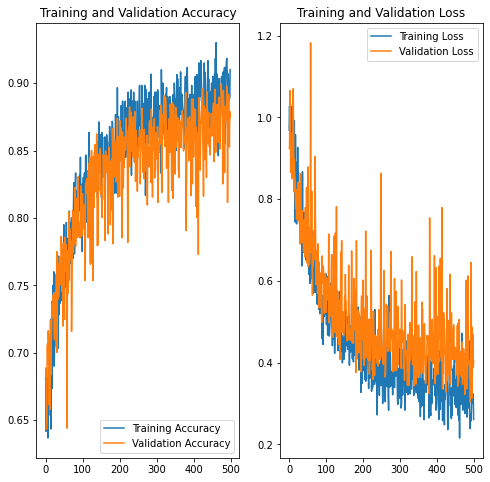

In [59]:
EPOCHS = 500

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Spider_mites_Two_spotted_spider_mite
predicted label: Tomato_Spider_mites_Two_spotted_spider_mite


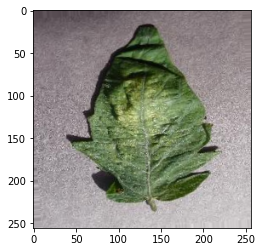

In [60]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [61]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

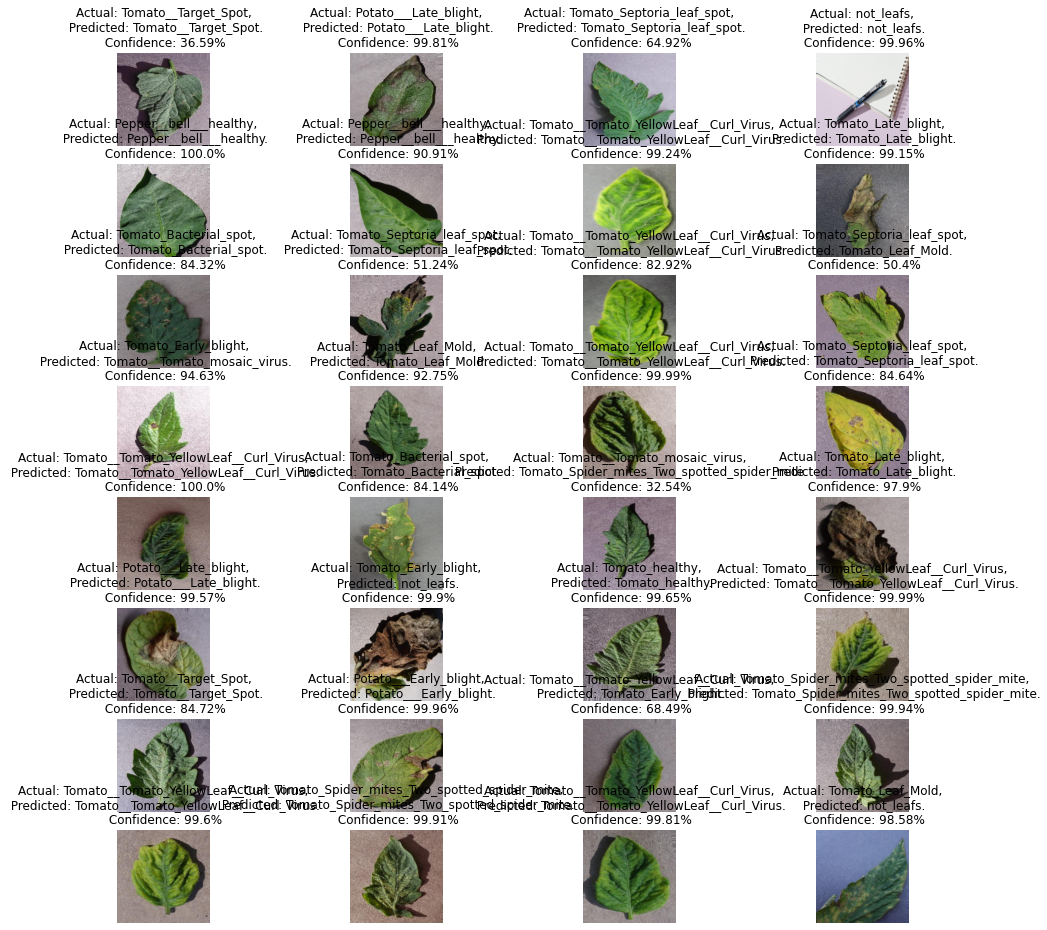

In [62]:
plt.figure(figsize=(16, 16))
for images, labels in test_generator:
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [64]:
model.save("../Model3.h5")